In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import data

In [2]:
import pandas as pd
HDBData=pd.read_csv("/content/drive/MyDrive/HDB data/Project dataset/Median Rent by Town and Flat Type/MedianRentByTownAndFlatType.csv")
HDBData.head(15)

,quarter,town,flat_type,median_rent
0,2005-Q2,ANG MO KIO,1-RM,na
1,2005-Q2,ANG MO KIO,2-RM,na
2,2005-Q2,ANG MO KIO,3-RM,800
3,2005-Q2,ANG MO KIO,4-RM,950
4,2005-Q2,ANG MO KIO,5-RM,-
5,2005-Q2,ANG MO KIO,EXEC,na
6,2005-Q2,BEDOK,1-RM,na
7,2005-Q2,BEDOK,2-RM,na
8,2005-Q2,BEDOK,3-RM,800
9,2005-Q2,BEDOK,4-RM,900


#Clean data

In [3]:
dataCleaned=HDBData[~HDBData.median_rent.str.contains("-|na")]
# ~ is to reverse select the rows. So the results don't contain - or na
dataCleaned.head(10)

,quarter,town,flat_type,median_rent
2,2005-Q2,ANG MO KIO,3-RM,800
3,2005-Q2,ANG MO KIO,4-RM,950
8,2005-Q2,BEDOK,3-RM,800
9,2005-Q2,BEDOK,4-RM,900
10,2005-Q2,BEDOK,5-RM,1025
15,2005-Q2,BISHAN,4-RM,1000
16,2005-Q2,BISHAN,5-RM,1100
20,2005-Q2,BUKIT BATOK,3-RM,745
21,2005-Q2,BUKIT BATOK,4-RM,925
26,2005-Q2,BUKIT MERAH,3-RM,850


In [ ]:
dataCleaned["median_rent"]=dataCleaned["median_rent"].astype(int)

##Draw a boxplot on Bishan data

quarter        object
town           object
flat_type      object
median_rent     int64
dtype: object
       median_rent
count  5307.000000
mean   2071.667609
std     524.375364
min     300.000000
25%    1800.000000
50%    2100.000000
75%    2400.000000
max    4300.000000


<Axes: >

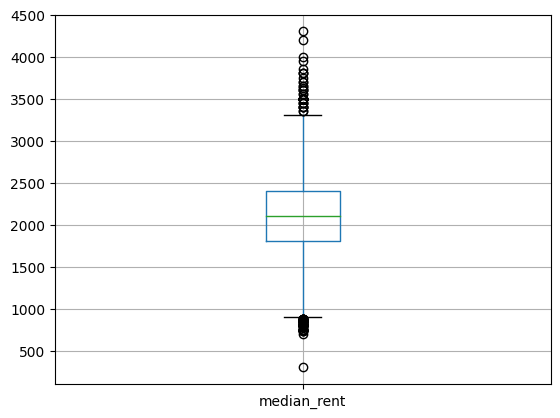

In [5]:
print(dataCleaned.dtypes)
print(dataCleaned.describe())
dataCleaned.boxplot(column=['median_rent'])

In [6]:
dataBishan=dataCleaned[dataCleaned.town.str.contains('BISHAN')]
print(dataBishan.head())
print(dataBishan.describe(include="all"))

     quarter    town flat_type  median_rent
15   2005-Q2  BISHAN      4-RM         1000
16   2005-Q2  BISHAN      5-RM         1100
176  2005-Q3  BISHAN      3-RM          780
177  2005-Q3  BISHAN      4-RM         1050
178  2005-Q3  BISHAN      5-RM         1200
        quarter    town flat_type  median_rent
count       202     202       202   202.000000
unique       71       2         4          NaN
top     2020-Q1  BISHAN      4-RM          NaN
freq          6     124        72          NaN
mean        NaN     NaN       NaN  2188.168317
std         NaN     NaN       NaN   516.070458
min         NaN     NaN       NaN   780.000000
25%         NaN     NaN       NaN  1885.000000
50%         NaN     NaN       NaN  2250.000000
75%         NaN     NaN       NaN  2587.500000
max         NaN     NaN       NaN  3550.000000


##Convert string to datetime format

In [ ]:
dataBishan['quarter'] = pd.PeriodIndex(dataBishan['quarter'], freq='Q').to_timestamp()
#datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')
#df['date'] = pd.PeriodIndex(qs, freq='Q').to_timestamp()


print(pd.unique(dataBishan.town))
print(pd.unique(dataBishan.flat_type))
print(pd.unique(dataBishan.quarter))
len(pd.unique(dataBishan.quarter))

In [8]:
dataBishan.head(10)
print(dataBishan.dtypes)

quarter        datetime64[ns]
town                   object
flat_type              object
median_rent             int64
dtype: object


## Strip the white space in string

In [ ]:
dataBishan["town"]=dataBishan["town"].str.replace(" ","")
print(pd.unique(dataBishan.town))

#Import matplotlib to draw data

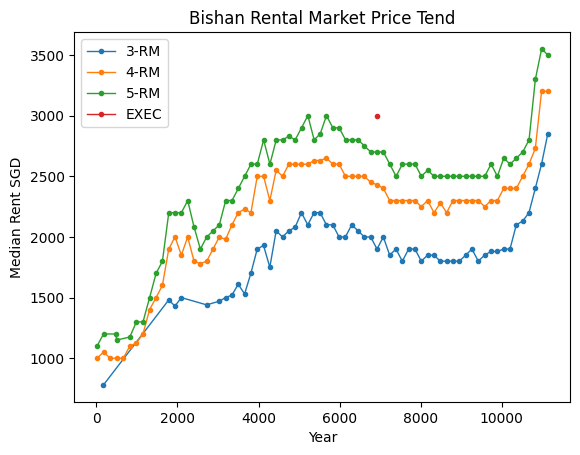

In [10]:
import matplotlib.pyplot as plt

#df = df.set_index('year')
#df.groupby('plant_var')['yield'].plot(legend=True, marker = 'o', linewidth = 2)
#plt.show()

#dataBishan = dataBishan.set_index('quarter')
dataBishan.groupby('flat_type')['median_rent'].plot(legend=True,marker = '.', linewidth = 1)
plt.xlabel('Year')
plt.ylabel('Median Rent SGD')
plt.title('Bishan Rental Market Price Tend')
plt.show()


# Draw a boxplot containing various towns

In [11]:
pd.unique(dataCleaned['town'])

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST',
       'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS',
       'QUEENSTOWN', 'SEMBAWANG', 'SERANGOON', 'TAMPINES', 'TOA PAYOH',
       'WOODLANDS', 'YISHUN', 'SENGKANG', 'CENTRAL', 'BUKIT PANJANG',
       'PUNGGOL', 'KALLANG/ WHAMPOA', 'BUKIT TIMAH', 'ANG MO KIO     ',
       'BEDOK          ', 'BISHAN         ', 'BUKIT BATOK    ',
       'BUKIT MERAH    ', 'BUKIT PANJANG  ', 'CENTRAL        ',
       'CHOA CHU KANG  ', 'CLEMENTI       ', 'GEYLANG        ',
       'HOUGANG        ', 'JURONG EAST    ', 'JURONG WEST    ',
       'MARINE PARADE  ', 'PASIR RIS      ', 'PUNGGOL        ',
       'QUEENSTOWN     ', 'SEMBAWANG      ', 'SENGKANG       ',
       'SERANGOON      ', 'TAMPINES       ', 'TOA PAYOH      ',
       'WOODLANDS      ', 'YISHUN         '], dtype=object)

In [ ]:
dataCleaned["town"]=dataCleaned.town.str.strip()
pd.unique(dataCleaned['town'])

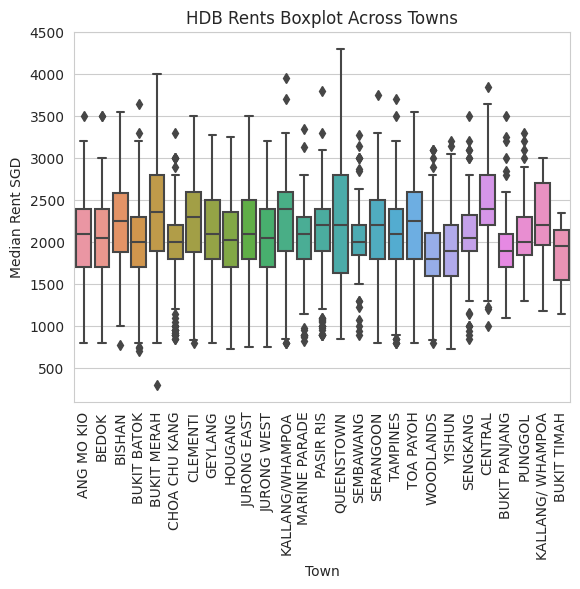

In [13]:
import seaborn as sns
sns.set_style("whitegrid")
ax=sns.boxplot(x="town", y="median_rent", data=dataCleaned)
plt.xticks(rotation=90)
plt.ylabel("Median Rent SGD")
plt.xlabel("Town")
plt.title("HDB Rents Boxplot Across Towns")
plt.show()
